In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib


In [2]:
# Paths
REG_CSV = "../data/processed/ecommerce_cleaned.csv"  # your cleaned dataset
OUTPUT_DIR = "../data/processed/regression/output"
RESULTS_DIR = "../results"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

In [3]:
# Load cleaned dataset
df = pd.read_csv(REG_CSV)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (392692, 15)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,DayOfWeek,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,8,2,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,8,2,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2,4


In [4]:
df = df[df['Quantity'] < 1000]
df = df[df['TotalPrice'] < 10000]

print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (392577, 15)


In [5]:
le_stock = LabelEncoder()
df['StockCode_enc'] = le_stock.fit_transform(df['StockCode'])

le_country = LabelEncoder()
df['Country_enc'] = le_country.fit_transform(df['Country'])

le_customer = LabelEncoder()
df['CustomerID_enc'] = le_customer.fit_transform(df['CustomerID'])

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,DayOfWeek,Quarter,StockCode_enc,Country_enc,CustomerID_enc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,8,2,4,3231,35,4010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2,4,2641,35,4010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,8,2,4,2845,35,4010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2,4,2793,35,4010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2,4,2792,35,4010


In [6]:
X = df[['StockCode_enc', 'CustomerID_enc', 'Country_enc', 'Quantity', 'UnitPrice', 
        'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Quarter']]
y = df['TotalPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (314061, 11) Test shape: (78516, 11)


In [7]:
# Train Multiple Regression Models and plot 
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name}: MSE={mse:.2f}, R2={r2:.4f}")


LinearRegression: MSE=2006.89, R2=0.5113
Ridge: MSE=2006.89, R2=0.5113
Lasso: MSE=2006.92, R2=0.5113
Lasso: MSE=2006.92, R2=0.5113
RandomForest: MSE=23.07, R2=0.9944
GradientBoosting: MSE=50.60, R2=0.9877


In [8]:
# Compare Results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2", ascending=False)
results_df


,MSE,R2
RandomForest,23.068979,0.994383
GradientBoosting,50.599734,0.987679
LinearRegression,2006.892428,0.511330
Ridge,2006.892439,0.511330
Lasso,2006.924515,0.511322


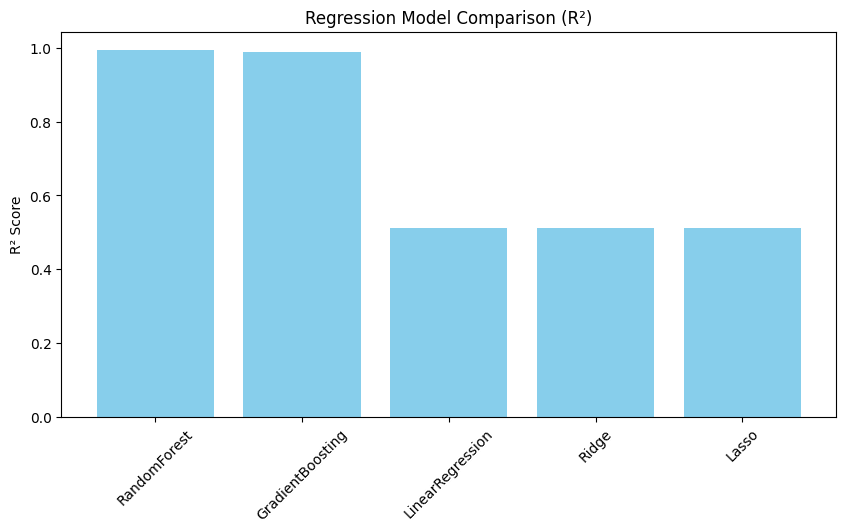

✅ Saved: ../results/model_r2_comparison.png


In [9]:
# Plot R² scores
plt.figure(figsize=(10,5))
plt.bar(results_df.index, results_df['R2'], color='skyblue')
plt.ylabel("R² Score")
plt.title("Regression Model Comparison (R²)")
plt.xticks(rotation=45)
plt.savefig(f"{RESULTS_DIR}/model_r2_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {RESULTS_DIR}/model_r2_comparison.png")

In [11]:
# Save results
OUTPUT_DIR = "../data/processed/regression/output"

# Save RandomForest model
best_model = RandomForestRegressor(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, f"{OUTPUT_DIR}/best_regression_model.pkl")

# Save encoders if used
joblib.dump(le_stock, f"{OUTPUT_DIR}/stock_encoder.pkl")
joblib.dump(le_country, f"{OUTPUT_DIR}/country_encoder.pkl")
joblib.dump(le_customer, f"{OUTPUT_DIR}/customer_encoder.pkl")


['../data/processed/regression/output/customer_encoder.pkl']

In [12]:
# Save predictions on test set
y_test_pred = best_model.predict(X_test)
pd.DataFrame({"y_true": y_test, "y_pred": y_test_pred}).to_csv(
    f"{OUTPUT_DIR}/predictions.csv", index=False
)


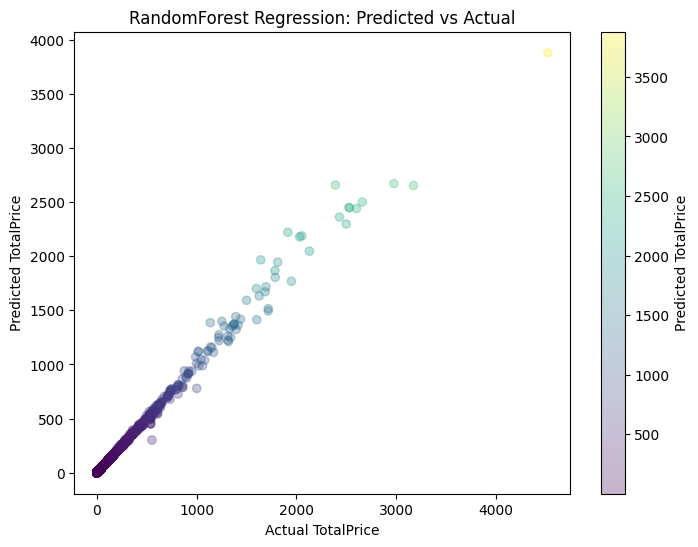

Saved: ../results/predicted_vs_actual.png


In [13]:
#Visualize predicted vs actual TotalPrice for sanity check and color coding 
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.3, c=y_test_pred, cmap='viridis')
plt.xlabel("Actual TotalPrice")
plt.ylabel("Predicted TotalPrice")
plt.title("RandomForest Regression: Predicted vs Actual")
plt.colorbar(label='Predicted TotalPrice')
plt.savefig(f"{RESULTS_DIR}/predicted_vs_actual.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {RESULTS_DIR}/predicted_vs_actual.png")

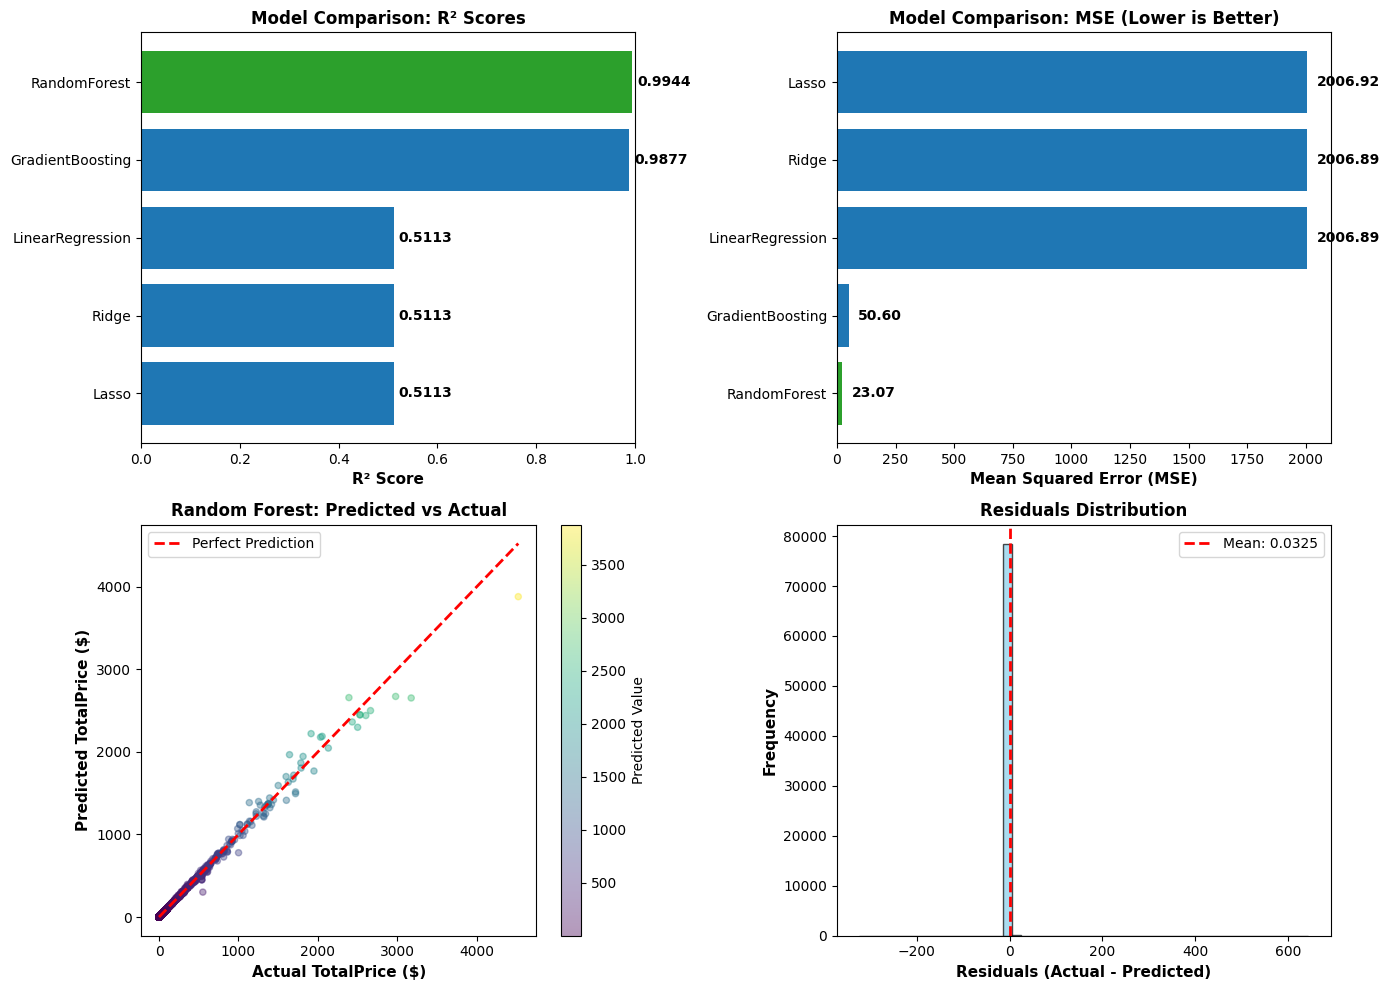


 Performance dashboard saved!
Saved: ../results/residuals_distribution.png


In [14]:

# Enhanced Visualization: Multiple Performance Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Model Comparison - R² Scores
ax1 = axes[0, 0]
models_sorted = results_df.sort_values('R2', ascending=True)
colors = ['#1f77b4' if x != models_sorted['R2'].max() else '#2ca02c' for x in models_sorted['R2']]
ax1.barh(models_sorted.index, models_sorted['R2'], color=colors)
ax1.set_xlabel('R² Score', fontsize=11, fontweight='bold')
ax1.set_title('Model Comparison: R² Scores', fontsize=12, fontweight='bold')
ax1.set_xlim([0, 1])
for i, v in enumerate(models_sorted['R2']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# Plot 2: Model Comparison - MSE
ax2 = axes[0, 1]
models_sorted_mse = results_df.sort_values('MSE', ascending=True)
colors_mse = ['#1f77b4' if x != models_sorted_mse['MSE'].min() else '#2ca02c' for x in models_sorted_mse['MSE']]
ax2.barh(models_sorted_mse.index, models_sorted_mse['MSE'], color=colors_mse)
ax2.set_xlabel('Mean Squared Error (MSE)', fontsize=11, fontweight='bold')
ax2.set_title('Model Comparison: MSE (Lower is Better)', fontsize=12, fontweight='bold')
for i, v in enumerate(models_sorted_mse['MSE']):
    ax2.text(v + max(models_sorted_mse['MSE'])*0.02, i, f'{v:.2f}', va='center', fontweight='bold')

# Plot 3: Predicted vs Actual (Scatter)
ax3 = axes[1, 0]
scatter = ax3.scatter(y_test, y_test_pred, alpha=0.4, c=y_test_pred, cmap='viridis', s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax3.set_xlabel('Actual TotalPrice ($)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Predicted TotalPrice ($)', fontsize=11, fontweight='bold')
ax3.set_title('Random Forest: Predicted vs Actual', fontsize=12, fontweight='bold')
ax3.legend()
plt.colorbar(scatter, ax=ax3, label='Predicted Value')

# Plot 4: Residuals Distribution
ax4 = axes[1, 1]
residuals = y_test - y_test_pred
ax4.hist(residuals, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax4.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {residuals.mean():.4f}')
ax4.set_xlabel('Residuals (Actual - Predicted)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Residuals Distribution', fontsize=12, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/residuals_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n Performance dashboard saved!")
print(f"Saved: {RESULTS_DIR}/residuals_distribution.png")

In [15]:

# Feature Importance Analysis for Random Forest
feature_names = ['StockCode_enc', 'CustomerID_enc', 'Country_enc', 'Quantity', 'UnitPrice', 
                 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Quarter']

# Get feature importance from best model
feature_importance = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance Ranking:")
print(importance_df)
print(f"\nTop 3 Features: {', '.join(importance_df.head(3)['Feature'].tolist())}")


Feature Importance Ranking:
           Feature  Importance
4        UnitPrice    0.510530
3         Quantity    0.475886
0    StockCode_enc    0.003708
1   CustomerID_enc    0.002787
6            Month    0.001597
7              Day    0.001530
8             Hour    0.001154
10         Quarter    0.001024
2      Country_enc    0.000876
9        DayOfWeek    0.000753
5             Year    0.000155

Top 3 Features: UnitPrice, Quantity, StockCode_enc


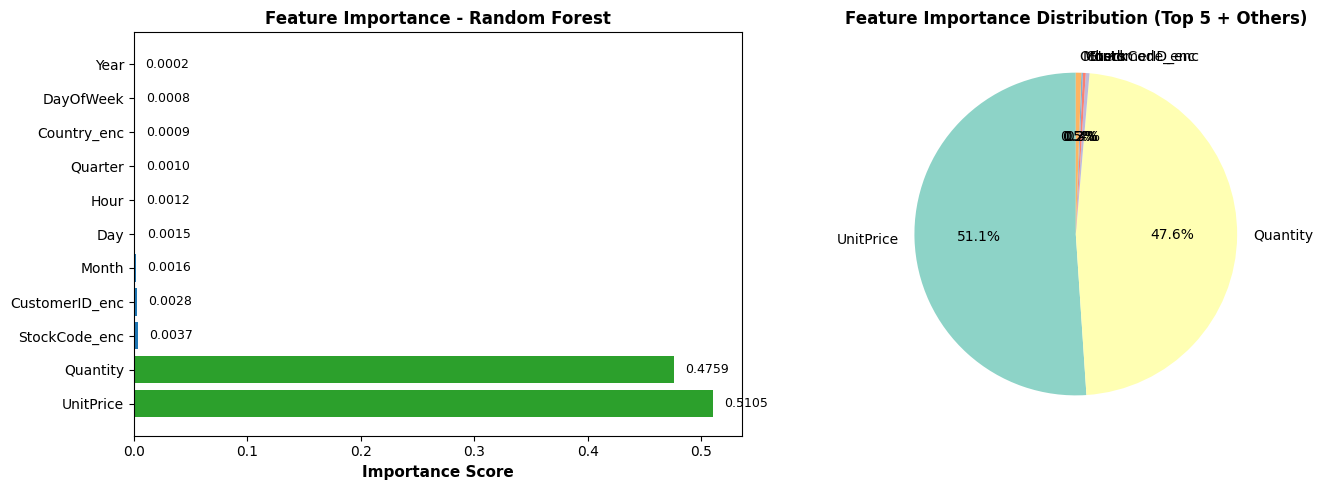

Saved: ../results/feature_importance.png


In [16]:

# Feature Importance Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Horizontal Bar Chart
ax1 = axes[0]
colors_fi = ['#2ca02c' if i < 2 else '#1f77b4' for i in range(len(importance_df))]
ax1.barh(importance_df['Feature'], importance_df['Importance'], color=colors_fi)
ax1.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax1.set_title('Feature Importance - Random Forest', fontsize=12, fontweight='bold')
for i, v in enumerate(importance_df['Importance']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

# Plot 2: Pie Chart
ax2 = axes[1]
top_n = 5
top_features = importance_df.head(top_n)
other_importance = importance_df.iloc[top_n:]['Importance'].sum()

pie_data = list(top_features['Importance']) + [other_importance]
pie_labels = list(top_features['Feature']) + ['Others']
colors_pie = plt.cm.Set3(range(len(pie_data)))

ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax2.set_title('Feature Importance Distribution (Top 5 + Others)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: {RESULTS_DIR}/feature_importance.png")